### 비지도 학습
- 사전 훈련이 어려울 시 진행
- 타겟(class)가 없는경우

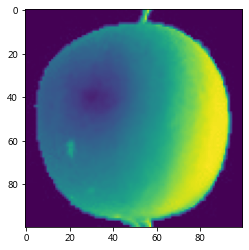

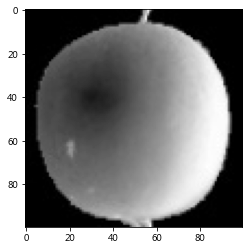

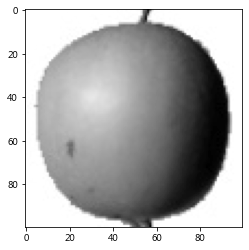

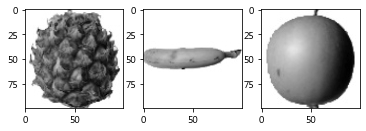

In [59]:
# 데이터 준비 - 과일 데이터
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('data/fruits_300.npy', allow_pickle=True)
fruits.shape 
# 300 100 100 -> 100*100의 크기의 이미지가 300개 있다는 말
# print(fruits)

# 첫번재 이미지의 첫행의 모든열(0~99)출력
fruits[0,0, :]

# 원본 사진(흰색바탕) -> 넘파이 배열 저장(반전) 이유는 물체에 집중 처리
# 0값은 곱샘 덧샘 할때 0 이되니까 물체를 255로 만듦
# 기본 색 - 담녹색
plt.imshow(fruits[2], cmap='viridis')
plt.show()
# 흑백
plt.imshow(fruits[2], cmap='gray')
plt.show()
# 반전
plt.imshow(fruits[2], cmap='gray_r')
plt.show()


fig, axs = plt.subplots(1, 3)

axs[0].imshow(fruits[100], cmap='gray_r') #파인애플
axs[1].imshow(fruits[200], cmap='gray_r') #바나나
axs[2].imshow(fruits[0], cmap='gray_r') #사과
plt.show()

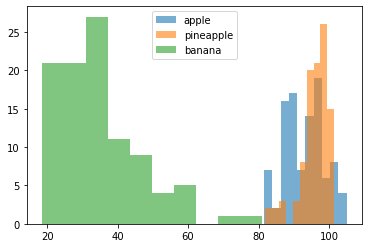

In [4]:
# 픽셀값 분석 - 샘플 차원 변경하기
# 이미지 데이터(2차원)을 배열계산 평균을 편하게 하기 위해 1차원 배열로 변환
# 사과, 파인애플, 바나나 이미지 100개의 픽셀 값 평균으로 분류가 가능한지 확인

import numpy as np

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
apple.shape 
#( 100,1000) 1000크기가 있는 데이터가 100개 있음

# 샘플 평균 히스토그램
# 각 과일 이미지별 픽셀의 평균을 구함(axix=1-행)
apple.mean(axis=1)

# 히스토그램(alpha는 투명도, 1보다 작게 중첩 부분이 보이도록 하기)
plt.hist(np.mean(apple, axis=1), alpha = 0.6)
plt.hist(np.mean(pineapple, axis=1), alpha = 0.6)
plt.hist(np.mean(banana, axis=1), alpha = 0.6)
plt.legend(['apple','pineapple','banana'])
plt.show()

# 파인애들이랑 사과가 비슷한 구간에 있어서 피처로는 어려울거같음

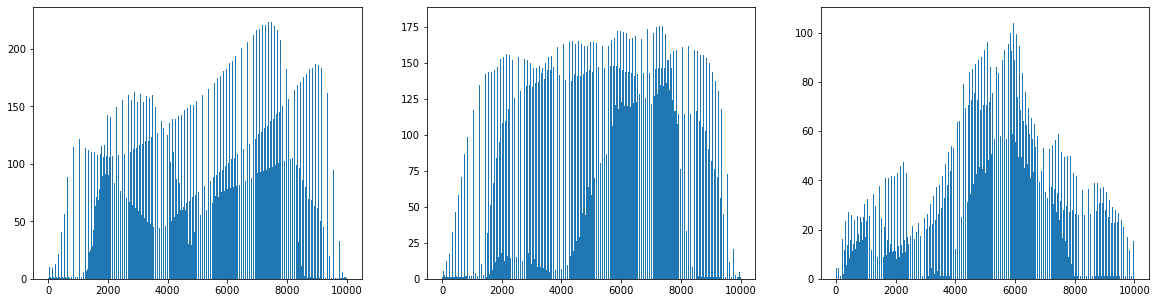

In [9]:
# 픽셀의 평균 히스토그램
# 샘플 이미지별이 아닌 픽셀별 평균값으로 분석하기
# 10000개 픽셀에 대한 평균을 막대 그래프

# 서브플롯 -> suplot - 여러개 그래프를 출력할 수 있게 만들어줌

fig, ax = plt.subplots(1,3, figsize=(20,5,))
ax[0].bar(range(10000), np.mean(apple, axis=0))
ax[1].bar(range(10000), np.mean(pineapple, axis=0))
ax[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)
for k in my_list:
    ax[0][0].scatter(df[df['species'] == k]['petal_length'], df[df['species'] == k]['petal_width'], label=k)
ax[0][0].set_title('정답')
ax[0][0].legend()




for i in range(0, 3):
    ax[0][1].scatter(df[df['pred'] == i]['petal_length'], df[df['pred'] == i]['petal_width'], label=i)
ax[0][1].set_title('예측')
ax[0][1].legend()




for i in range(0, 3):
    ax[1][0].scatter(df[df['cluster'] == i]['petal_length'], df[df['cluster'] == i]['petal_width'], label=i)
ax[1][0].set_title('군집')
ax[1][0].legend()

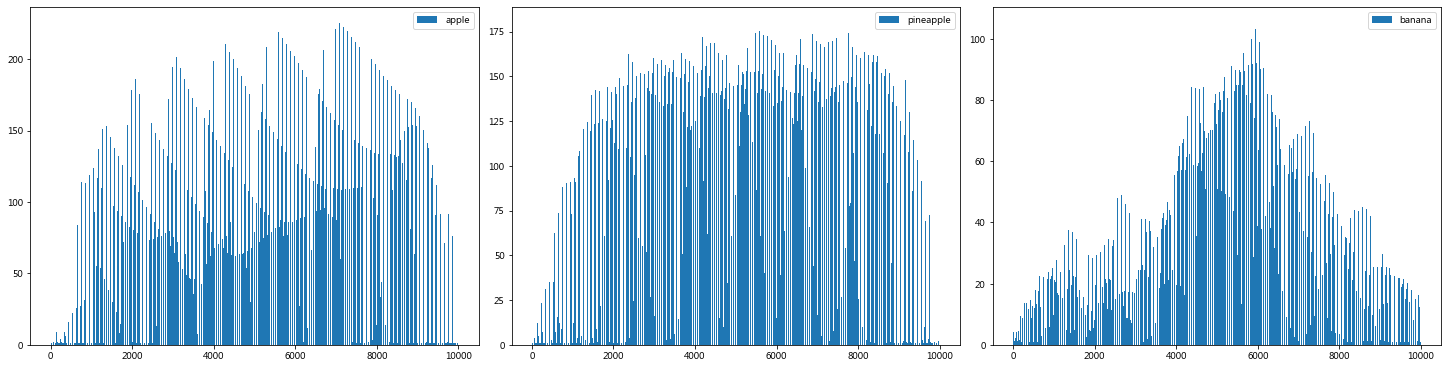

In [27]:
# 서브프롯에 범례
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/mmrtextb.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(1,3, figsize=(20,5),constrained_layout=True) # 간격조절  true
ax[0].bar(range(10000), np.mean(apple, axis=0), label= 'apple')
ax[1].bar(range(10000), np.mean(pineapple, axis=0), label= 'pineapple')
ax[2].bar(range(10000), np.mean(banana, axis=0), label= 'banana')
for i in range(3):
    ax[i].legend(loc='best')
plt.show()


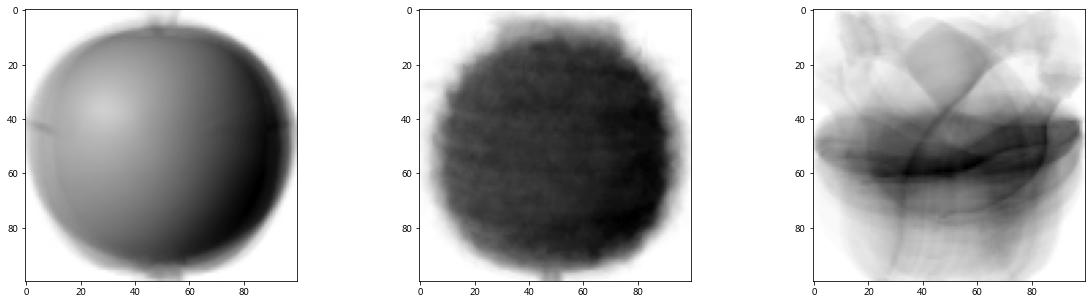

In [33]:
# 평균 이미지 그리기
# 각 과일 100개의 픽셀 평균한 값 axis=0dmf 이미지로 출력
# 10000개 픽셀 평균값을 100*100 으로 2차원 배열 변환
# 한 행에 2개 그래프 열 출력
import numpy as np

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].imshow(np.mean(apple, axis=0).reshape(100,100), cmap='gray_r')
ax[1].imshow(np.mean(pineapple, axis=0).reshape(100,100), cmap='gray_r')
ax[2].imshow(np.mean(banana, axis=0).reshape(100,100), cmap='gray_r')
plt.show()

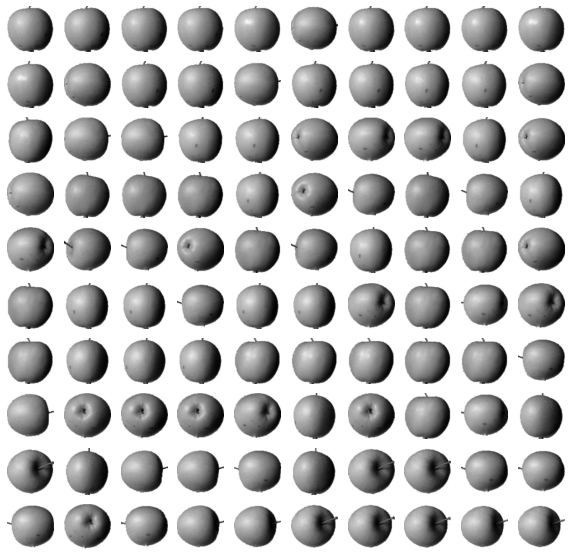

In [52]:
# 모델 평가
# 사과 평균 이미지와 원본 이미지와의 차이를 구해서 얼마나 사과를 잘 분류하는지
# 사과 평균과 가장 까운것들 100개 출력
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

abs_diff = np.abs(fruits - apple_mean) # 300개 과일 -  사과평균의 절대값
abs_mean = np.mean(abs_diff, axis=(1,2)) #차이 300개에 대해서 각각 평균

apple_index = np.argsort(abs_mean)[:100] #300개중 가장 자은 값의 인덱스
fig, ax = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        ax[i,j].axis('off')
plt.show()

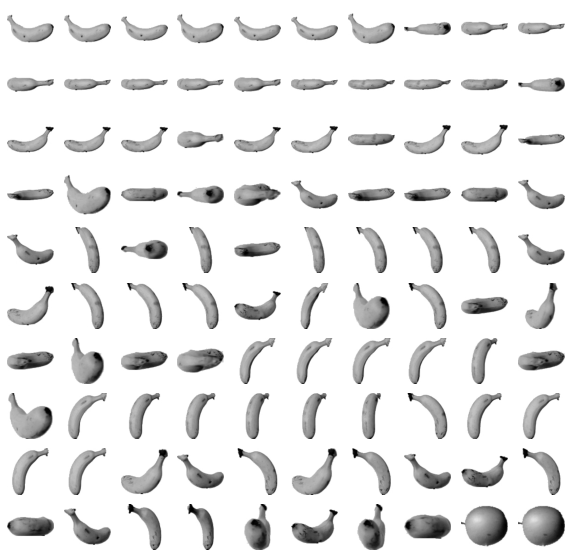

In [54]:
# 확인 문제
# 바나나 평균 구하기
abs_diff = np.abs(fruits - banana_mean) # 300개 과일 -  바나나평균의 절대값
abs_mean = np.mean(abs_diff, axis=(1,2)) #차이 300개에 대해서 각각 평균

banana_index = np.argsort(abs_mean)[:100] #300개중 가장 자은 값의 인덱스
fig, ax = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        ax[i,j].axis('off')
plt.show()